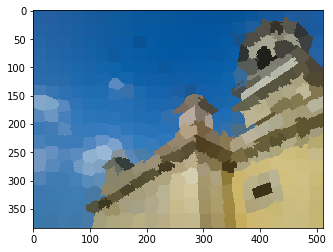

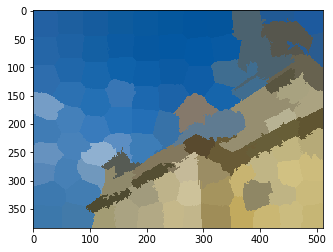

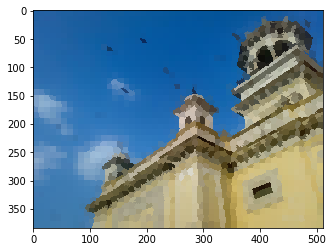

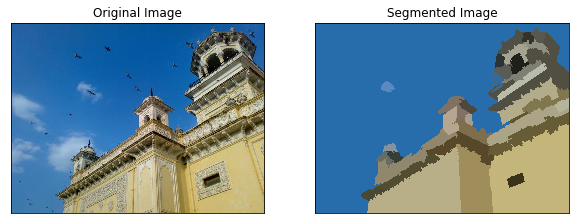

In [14]:
from skimage import segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
import cv2

# Read image
img = cv2.cvtColor(cv2.imread('home.jpg'), cv2.COLOR_BGR2RGB)

# apply k-means. This will generate super pixels
labels1 = segmentation.slic(img, compactness=30, n_segments=400)
out1 = color.label2rgb(labels1, img, kind='avg')
plt.imshow(out1); plt.show()

# -----------------compare compactness-------------------------
# labels2 = segmentation.slic(img, compactness=100, n_segments=400)
# out2 = color.label2rgb(labels2, img, kind='avg')
# plt.imshow(out2); plt.show()

# labels3 = segmentation.slic(img, compactness=250, n_segments=400)
# out3 = color.label2rgb(labels3, img, kind='avg')
# plt.imshow(out3); plt.show()

# -----------------compare n_segments--------------------------
labels2 = segmentation.slic(img, compactness=30, n_segments=100)
out2 = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out2); plt.show()

labels3 = segmentation.slic(img, compactness=30, n_segments=2000)
out3 = color.label2rgb(labels3, img, kind='avg')
plt.imshow(out3); plt.show()



# apply graph cut
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg')

# display
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(out2)
plt.title("Segmented Image"), plt.xticks([]), plt.yticks([])
plt.show()

By changing the compactness with higher values, it can be observed that the resulting pixels are more square/cubic. 
The definition of the compactnessis the balances color proximity and space proximity. Higher values give more weight to space proximity, making superpixel shapes more square/cubic. (quote from the skimage library)

By changing the n_segments